In [53]:
import pandas as pd
import re
from prettytable import PrettyTable as pt
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from numpy import nan
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
plt.style.use('dark_background')
from numpy import mean
from numpy import array
filterwarnings('ignore')
%matplotlib inline

In [4]:
df = pd.read_csv('./dataset/titanic_train.csv')
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(['PassengerId'],axis=1,inplace=True)
df.drop(['Ticket'],axis=1,inplace=True)
df.columns = ['Survived','Class','Name','Sex','Age','#Spouse','#NumParents&Kids','Fare','Cabin','Embarked']
display(df.head())

,Survived,Class,Name,Sex,Age,#Spouse,#NumParents&Kids,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [6]:
df['FamilySize'] = df['#Spouse'] + df['#NumParents&Kids'] + 1

In [7]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    return title_search.group(1) if title_search else ""

In [8]:
df['Title'] = df['Name'].apply(get_title)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
display(df)

,Survived,Class,Name,Sex,Age,#Spouse,#NumParents&Kids,Fare,Cabin,Embarked,FamilySize,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,0,Rare
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,0,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,3,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,0,Mr


In [9]:
df.drop(['Name'],axis=1,inplace=True)

In [10]:
df[df.duplicated()]

,Survived,Class,Sex,Age,#Spouse,#NumParents&Kids,Fare,Cabin,Embarked,FamilySize,Title
47,1,3,female,NaN,0,0,7.7500,NaN,Q,0,Miss
76,0,3,male,NaN,0,0,7.8958,NaN,S,0,Mr
77,0,3,male,NaN,0,0,8.0500,NaN,S,0,Mr
87,0,3,male,NaN,0,0,8.0500,NaN,S,0,Mr
95,0,3,male,NaN,0,0,8.0500,NaN,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...
863,0,3,female,NaN,8,2,69.5500,NaN,S,10,Miss
870,0,3,male,26.0,0,0,7.8958,NaN,S,0,Mr
877,0,3,male,19.0,0,0,7.8958,NaN,S,0,Mr
878,0,3,male,NaN,0,0,7.8958,NaN,S,0,Mr


In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df[df.duplicated()]

,Survived,Class,Sex,Age,#Spouse,#NumParents&Kids,Fare,Cabin,Embarked,FamilySize,Title


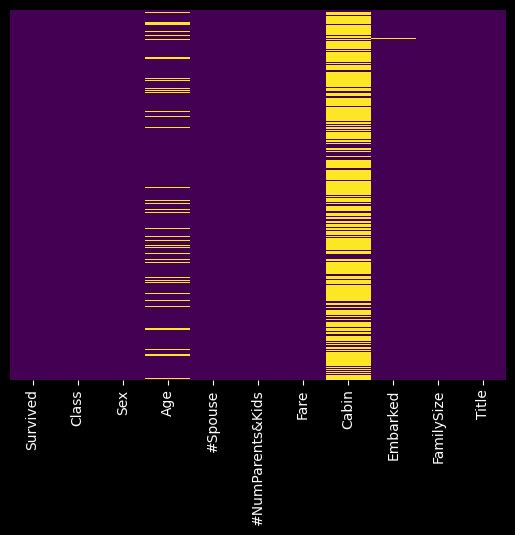

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [14]:
display(df)

,Survived,Class,Sex,Age,#Spouse,#NumParents&Kids,Fare,Cabin,Embarked,FamilySize,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,1,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,1,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,1,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,0,Rare
887,1,1,female,19.0,0,0,30.0000,B42,S,0,Miss
888,0,3,female,NaN,1,2,23.4500,NaN,S,3,Miss
889,1,1,male,26.0,0,0,30.0000,C148,C,0,Mr


In [15]:
df['Fare'] = pd.cut(df['Fare'], bins=[0,7.91,14.45,31,120], labels=['low_fare','median_fare','average_fare','high_fare'])

In [16]:
display(df)

,Survived,Class,Sex,Age,#Spouse,#NumParents&Kids,Fare,Cabin,Embarked,FamilySize,Title
0,0,3,male,22.0,1,0,low_fare,NaN,S,1,Mr
1,1,1,female,38.0,1,0,high_fare,C85,C,1,Mrs
2,1,3,female,26.0,0,0,median_fare,NaN,S,0,Miss
3,1,1,female,35.0,1,0,high_fare,C123,S,1,Mrs
4,0,3,male,35.0,0,0,median_fare,NaN,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,median_fare,NaN,S,0,Rare
887,1,1,female,19.0,0,0,average_fare,B42,S,0,Miss
888,0,3,female,NaN,1,2,average_fare,NaN,S,3,Miss
889,1,1,male,26.0,0,0,average_fare,C148,C,0,Mr


In [17]:
df.isnull().sum()

Survived              0
Class                 0
Sex                   0
Age                 109
#Spouse               0
#NumParents&Kids      0
Fare                 48
Cabin               585
Embarked              2
FamilySize            0
Title                 0
dtype: int64

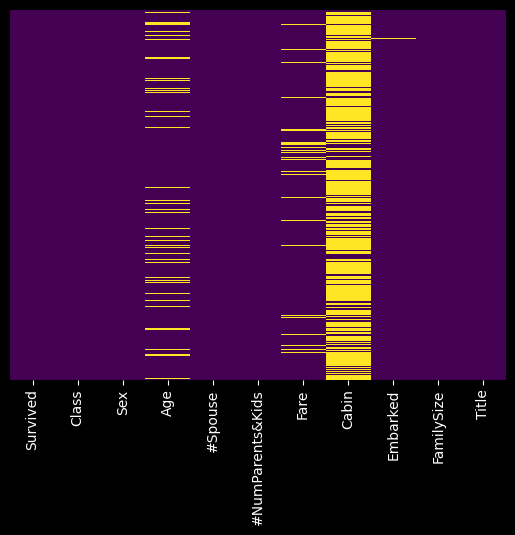

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [19]:
df.drop(['Cabin'],axis=1,inplace=True)

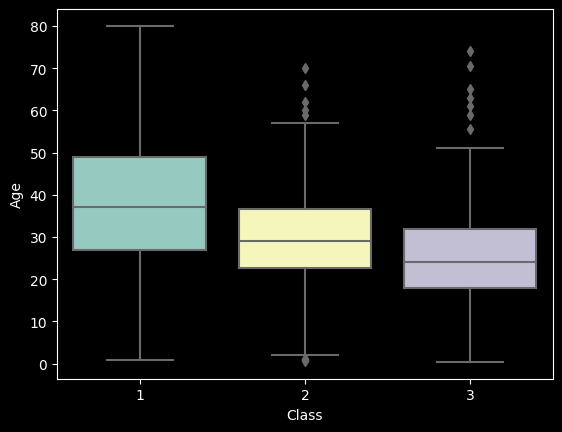

In [20]:
sns.boxplot(x='Class',y='Age',data=df)
plt.show()

In [21]:
class_age_df = df[['Class','Age']]
class_age_df

,Class,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
886,2,27.0
887,1,19.0
888,3,NaN
889,1,26.0


In [22]:
def get_age_mean_by_class(df):
    low_class_mean = round(df[(df['Class']==1)].mean())[1]
    med_class_mean = round(df[(df['Class']==2)].mean())[1]
    high_class_mean = round(df[(df['Class']==3)].mean())[1]
    return [low_class_mean, med_class_mean, high_class_mean]

In [23]:
def age_mean_imputation_base_on_class(age_class_df):
    age_mean_by_class = get_age_mean_by_class(class_age_df)
    Age = age_class_df[0]
    Class = age_class_df[1]
    if pd.isnull(Age):
        if Class == 1: return age_mean_by_class[0]
        elif Class == 2: return age_mean_by_class[1]
        else: return age_mean_by_class[2]
    else: return Age

In [24]:
df['Age'] = df[['Age','Class']].apply(age_mean_imputation_base_on_class,axis=1)

In [25]:
df['Age'] = pd.cut(df['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
display(df)

,Survived,Class,Sex,Age,#Spouse,#NumParents&Kids,Fare,Embarked,FamilySize,Title
0,0,3,male,Adult,1,0,low_fare,S,1,Mr
1,1,1,female,Adult,1,0,high_fare,C,1,Mrs
2,1,3,female,Adult,0,0,median_fare,S,0,Miss
3,1,1,female,Adult,1,0,high_fare,S,1,Mrs
4,0,3,male,Adult,0,0,median_fare,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,Adult,0,0,median_fare,S,0,Rare
887,1,1,female,Teenage,0,0,average_fare,S,0,Miss
888,0,3,female,Adult,1,2,average_fare,S,3,Miss
889,1,1,male,Adult,0,0,average_fare,C,0,Mr


In [26]:
def imputeEmbarked(x): return df['Embarked'].mode()[0] if x is nan else x
df['Embarked'] = df.Embarked.apply(imputeEmbarked)

In [27]:
dummyDf = pd.get_dummies(df, columns = ["Sex","Title","Age","Embarked","Fare"],drop_first=True)

In [28]:
df.drop(["Sex","Title","Age","Embarked","Fare"],axis=1,inplace=True)

In [29]:
df = pd.concat([dummyDf],axis=1)

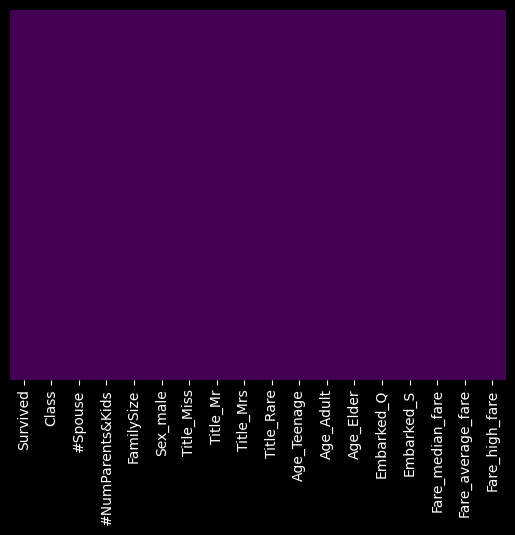

In [30]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [31]:
df.describe()

,Survived,Class,#Spouse,#NumParents&Kids,FamilySize,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_Teenage,Age_Adult,Age_Elder,Embarked_Q,Embarked_S,Fare_median_fare,Fare_average_fare,Fare_high_fare
count,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,0.411914,2.244613,0.531052,0.415716,0.946768,0.624842,0.214195,0.550063,0.157161,0.029151,0.131812,0.594423,0.187579,0.076046,0.726236,0.233207,0.275032,0.225602
std,0.492492,0.854808,1.019162,0.836694,1.547785,0.484471,0.410523,0.497803,0.364183,0.168336,0.338501,0.491315,0.390623,0.265239,0.446172,0.423141,0.446813,0.418243
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,3.000000,8.000000,6.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df.dtypes

Survived             int64
Class                int64
#Spouse              int64
#NumParents&Kids     int64
FamilySize           int64
Sex_male             uint8
Title_Miss           uint8
Title_Mr             uint8
Title_Mrs            uint8
Title_Rare           uint8
Age_Teenage          uint8
Age_Adult            uint8
Age_Elder            uint8
Embarked_Q           uint8
Embarked_S           uint8
Fare_median_fare     uint8
Fare_average_fare    uint8
Fare_high_fare       uint8
dtype: object

In [33]:
display(df)

,Survived,Class,#Spouse,#NumParents&Kids,FamilySize,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_Teenage,Age_Adult,Age_Elder,Embarked_Q,Embarked_S,Fare_median_fare,Fare_average_fare,Fare_high_fare
0,0,3,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0
1,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
2,1,3,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0
3,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
4,0,3,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0
887,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
888,0,3,1,2,3,0,1,0,0,0,0,1,0,0,1,0,1,0
889,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0


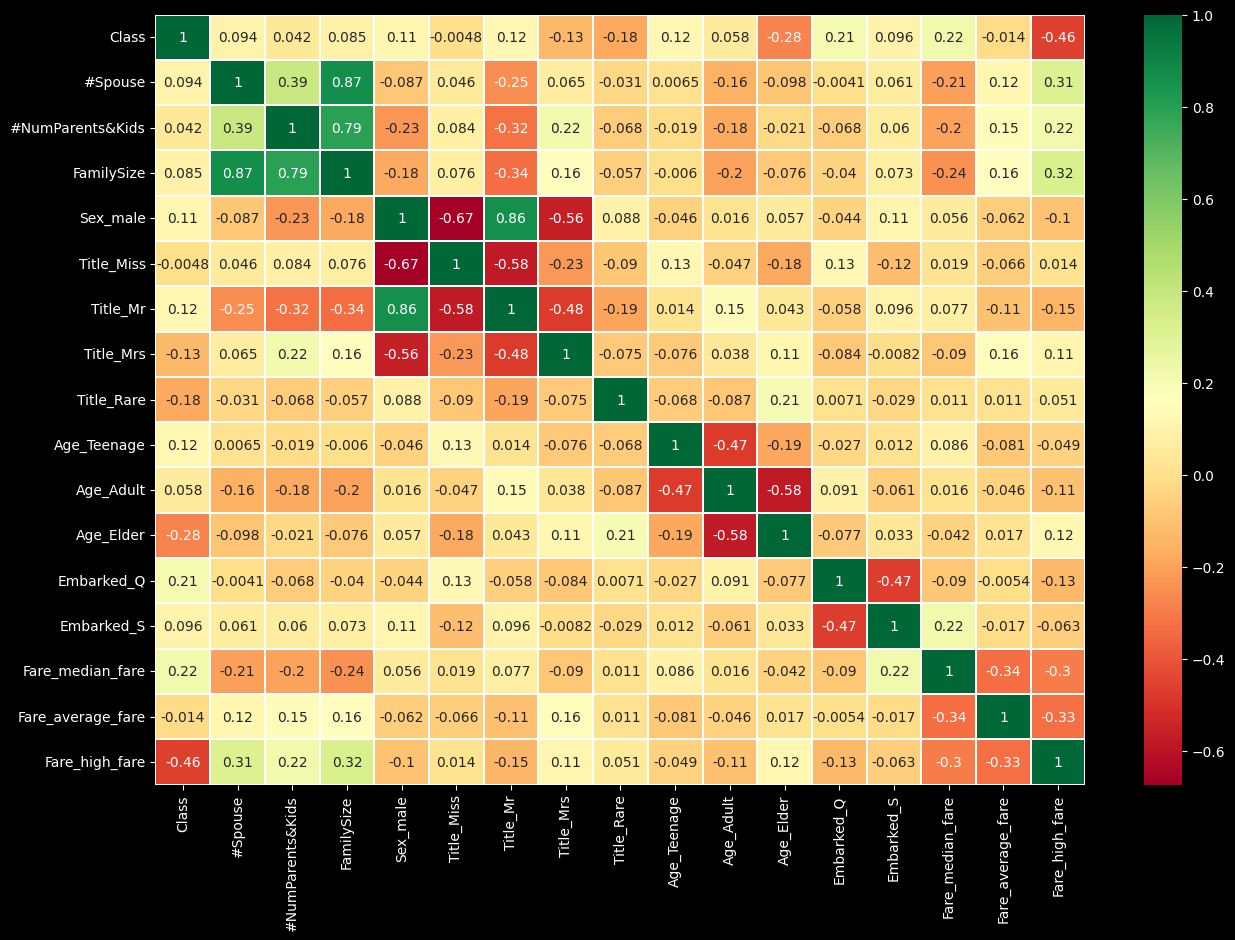

In [34]:
sns.heatmap(df.iloc[:,1:].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

In [35]:
df.describe()

,Survived,Class,#Spouse,#NumParents&Kids,FamilySize,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_Teenage,Age_Adult,Age_Elder,Embarked_Q,Embarked_S,Fare_median_fare,Fare_average_fare,Fare_high_fare
count,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,0.411914,2.244613,0.531052,0.415716,0.946768,0.624842,0.214195,0.550063,0.157161,0.029151,0.131812,0.594423,0.187579,0.076046,0.726236,0.233207,0.275032,0.225602
std,0.492492,0.854808,1.019162,0.836694,1.547785,0.484471,0.410523,0.497803,0.364183,0.168336,0.338501,0.491315,0.390623,0.265239,0.446172,0.423141,0.446813,0.418243
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,3.000000,8.000000,6.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
display(df)

,Survived,Class,#Spouse,#NumParents&Kids,FamilySize,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_Teenage,Age_Adult,Age_Elder,Embarked_Q,Embarked_S,Fare_median_fare,Fare_average_fare,Fare_high_fare
0,0,3,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0
1,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
2,1,3,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0
3,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
4,0,3,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0
887,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
888,0,3,1,2,3,0,1,0,0,0,0,1,0,0,1,0,1,0
889,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0


In [37]:
def get_dataset(df):
	y = df.iloc[:,0]
	X = df.iloc[:,1:]
	return X, y
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [38]:
def get_logreg_models(df,X,y):
	models_list = []
	models = {}
	supportRanking = []
	for numFeatures in range(2,df.shape[1]+1):
		# lr
		rfe = RFE(estimator=LogisticRegression(), n_features_to_select=numFeatures)
		model = LogisticRegression()
		models[f'lr{-numFeatures}'] = Pipeline(steps=[('s',rfe),('m',model)])
		rfe.fit(X,y)
		supportRanking.append([rfe.support_,rfe.ranking_])
		models_list.append(models)
		# perceptron
		rfe = RFE(estimator=Perceptron(), n_features_to_select=numFeatures)
		rfe.fit(X,y)
		supportRanking.append([rfe.support_,rfe.ranking_])
		model = LogisticRegression()
		models[f'per{-numFeatures}'] = Pipeline(steps=[('s',rfe),('m',model)])
		models_list.append(models)
		# cart
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=numFeatures)
		rfe.fit(X,y)
		supportRanking.append([rfe.support_,rfe.ranking_])
		model = LogisticRegression()
		models[f'cart{-numFeatures}'] = Pipeline(steps=[('s',rfe),('m',model)])
		models_list.append(models)
		# rf
		rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=numFeatures)
		rfe.fit(X,y)
		supportRanking.append([rfe.support_,rfe.ranking_])
		model = LogisticRegression()
		models[f'rf{-numFeatures}'] = Pipeline(steps=[('s',rfe),('m',model)])
		models_list.append(models)
		# gbm
		rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=numFeatures)
		rfe.fit(X,y)
		supportRanking.append([rfe.support_,rfe.ranking_])
		model = LogisticRegression()
		models[f'gbm{-numFeatures}'] = Pipeline(steps=[('s',rfe),('m',model)])
		models_list.append(models)
	return models,supportRanking

In [39]:
def getFinalResults(X,y,theModel):
    finalResults = {}
    for rfeEstimator,models in zip(theModel.keys(),theModel.values()):
        results, names = [],[]
        for model in models:
            scores = evaluate_model(model, X, y)
            results.append(scores)
            finalResults[rfeEstimator] = mean(results)
    return finalResults

def getDictKeyFromValue(d:dict,value):
    keys = [k for k, v in d.items() if v == value]
    return keys

def getBestRFEEstimatorWithNumFeatures(finalResults:dict):
    output = []
    allAverage = finalResults.values()
    bestEstimator = max(allAverage)
    estimatorName = getDictKeyFromValue(finalResults,bestEstimator)
    output.append(estimatorName)
    output.append(bestEstimator)
    return output

def printBestRFEEstimatorWithNumFeaturesName(bestRFEEstimator,model):
    translateAbbreviation = {'lr':'Logistic Regression','per':'Perceptron','cart':'Decision Tree','rf':'Random Forest','gbm':
        'Gradient Boosting'}
    theEstimator = bestRFEEstimator[0][0]
    stripIndex = theEstimator.index('-')
    theEstimatorFull = translateAbbreviation[theEstimator[:stripIndex]]
    theAccuracy = bestRFEEstimator[1]
    numFeatures = theEstimator[stripIndex+1:]
    print(f'RFE Estimator terbaik untuk model {model} adalah {theEstimatorFull} dengan {numFeatures} jumlah fitur.')
    print(f'Akurasi = {(theAccuracy*100)}%')

def getNumFeaturesWithIndex(theModel,bestEstimatorLogReg):
    keyList = list(theModel.keys())
    theIndex = keyList.index(bestEstimatorLogReg[0][0])
    return theIndex

def getSelectedFeatures(theModel,bestEstimator,rfeSupport):
    theSelectedEstimatorIndex = getNumFeaturesWithIndex(theModel,bestEstimator)
    selectedFeaturesList = rfeSupport[theSelectedEstimatorIndex][0]
    selectedFeatures = []
    for i in range(len(selectedFeaturesList)):
        if selectedFeaturesList[i]: selectedFeatures.append(i+1)
    selectedFeatures = [0] + selectedFeatures
    return selectedFeatures

# Logistic Regression Model

In [40]:
# define dataset
X, y = get_dataset(df)

In [41]:
logisticRegressionModel,rfeSupport = get_logreg_models(df,X,y)
modelName = 'Logistic Regression'
print(f'{modelName} Model')
logregResults = getFinalResults(X,y,logisticRegressionModel)
print(logregResults)

Logistic Regression Model
{'lr-2': 0.7839662447257384, 'per-2': 0.7289029535864979, 'cart-2': 0.7833333333333333, 'rf-2': 0.782711240939089, 'gbm-2': 0.7833333333333333, 'lr-3': 0.7833360380828736, 'per-3': 0.7516688304662987, 'cart-3': 0.7892594395758952, 'rf-3': 0.7831223628691982, 'gbm-3': 0.7890430596126798, 'lr-4': 0.7883831007248728, 'per-4': 0.749986476252299, 'cart-4': 0.7911554690035703, 'rf-4': 0.8000135237477008, 'gbm-4': 0.8031834902088065, 'lr-5': 0.7924077680406794, 'per-5': 0.7510061668289516, 'cart-5': 0.7934761441090555, 'rf-5': 0.7928270042194093, 'gbm-5': 0.8021205236395109, 'lr-6': 0.7909309747917344, 'per-6': 0.7463648166179812, 'cart-6': 0.7932489451476793, 'rf-6': 0.7917775613978146, 'gbm-6': 0.7979038191063507, 'lr-7': 0.790941793789895, 'per-7': 0.7390295358649789, 'cart-7': 0.7934599156118143, 'rf-7': 0.7883885102239532, 'gbm-7': 0.796432435356486, 'lr-8': 0.7915774099318402, 'per-8': 0.760927188142378, 'cart-8': 0.7943037974683543, 'rf-8': 0.7892323920804932,

In [42]:
bestEstimatorLogReg = getBestRFEEstimatorWithNumFeatures(logregResults)
printBestRFEEstimatorWithNumFeaturesName(bestEstimatorLogReg,modelName)

RFE Estimator terbaik untuk model Logistic Regression adalah Gradient Boosting dengan 11 jumlah fitur.
Akurasi = 80.33917559234014%


In [43]:
selectedFeatures = getSelectedFeatures(logisticRegressionModel,bestEstimatorLogReg,rfeSupport)
newDfRFE = df.iloc[:,selectedFeatures]
newDfRFE

,Survived,Class,#Spouse,FamilySize,Sex_male,Title_Mr,Title_Rare,Age_Adult,Age_Elder,Embarked_S,Fare_median_fare,Fare_average_fare
0,0,3,1,1,1,1,0,1,0,1,0,0
1,1,1,1,1,0,0,0,1,0,0,0,0
2,1,3,0,0,0,0,0,1,0,1,1,0
3,1,1,1,1,0,0,0,1,0,1,0,0
4,0,3,0,0,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,0,1,1,0,1,1,0
887,1,1,0,0,0,0,0,0,0,1,0,1
888,0,3,1,3,0,0,0,1,0,1,0,1
889,1,1,0,0,1,1,0,1,0,0,0,1


In [79]:
def trainModelandCompare(df,dfAfterFeatureSelection,modelName:list,models:list,featureSelectionMethod: str):
    # figure, ax = plt.subplots(1,2, constrained_layout=True,figsize=((12,10)))
    accuracyList = []
    crossValScoreList = []
    accuracyListAfter = []
    crossValScoreListAfter = []
    for (_model,name) in zip(models,modelName):
        # Before Feature Selection Model
        X,y = get_dataset(df)
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
        model = _model
        model.fit(X_train,y_train)
        prediction_lr = model.predict(X_test)
        modelAccuracy = accuracy_score(prediction_lr,y_test)*100
        accuracyList.append(modelAccuracy)
        kfold = KFold(n_splits=10)
        result_lr = cross_val_score(model,X,y,cv=10,scoring='accuracy')
        crossValScore = result_lr.mean()*100
        crossValScoreList.append(crossValScore)
        y_pred = cross_val_predict(model,X,y,cv=10)
        # plt.title(f'{name} Confusion Matrix before Feature Selection', y=1.05, size=15)
        # sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")

        # After Feature Selection Model

        X,y = get_dataset(dfAfterFeatureSelection)
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
        model = _model
        model.fit(X_train,y_train)
        prediction_lr = model.predict(X_test)
        modelAccuracy = accuracy_score(prediction_lr,y_test)*100
        accuracyListAfter.append(modelAccuracy)
        kfold = KFold(n_splits=10)
        result_lr = cross_val_score(model,X,y,cv=10,scoring='accuracy')
        crossValScore = result_lr.mean()*100
        crossValScoreListAfter.append(crossValScore)
        y_pred = cross_val_predict(model,X,y,cv=10)
        # plt.title(f'{name} Confusion Matrix after Feature Selection', y=1.05, size=15)
        # sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")

    return accuracyList,accuracyListAfter,crossValScoreList,crossValScoreListAfter

KeyboardInterrupt: 

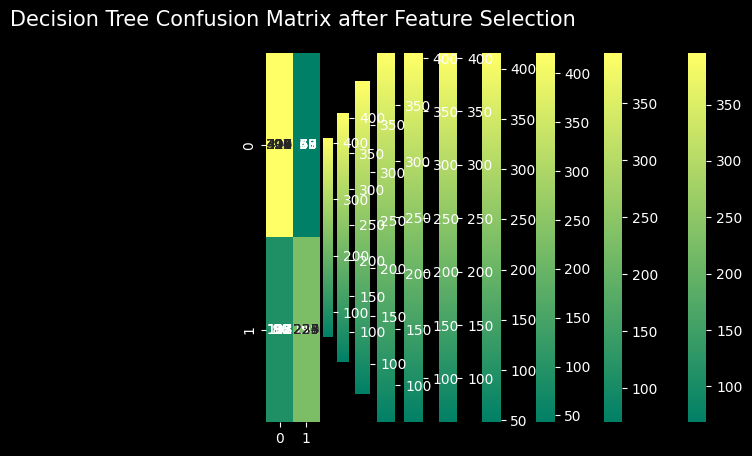

In [51]:
modelNames = ['Logistic Regression','KNN','SVM','Naive-Bayes','Decision Tree','RandomForest','Linear Discriminant Analysis','Ada Boost','Gradient Boosting']
models = [LogisticRegression(),KNeighborsClassifier(n_neighbors = 4),SVC(),GaussianNB(),DecisionTreeClassifier(criterion='gini', min_samples_split=10,min_samples_leaf=1,max_features='auto'),RandomForestClassifier(criterion='gini', n_estimators=700 ,min_samples_split=10,min_samples_leaf=1,max_features='auto',oob_score=True,random_state=1,n_jobs=-1),LinearDiscriminantAnalysis(),AdaBoostClassifier(),GradientBoostingClassifier()]
trainModelandCompare(df,newDfRFE,modelNames,models,'RFE')

In [154]:
def roundScore(l:list): return [round(i,3) for i in l]

def makeTable(modelNames:list,accuracyList,accuracyListAfter,crossValScore,crossValScoreAfter,featureSelectionMethod):
    comparisonTable = pt()
    comparisonTable.title = f'Tabel Komparasi {featureSelectionMethod} Feature Selection'
    comparisonTable.field_names = ["No","Model", "Akurasi (FS❌)", "Akurasi (FS✅)","CrossVal Score (FS❌) ","CrossVal Score(FS✅)"]
    n = len(modelNames)
    accuracyList = roundScore(accuracyList)
    accuracyListAfter = roundScore(accuracyListAfter)
    crossValScore = roundScore(crossValScore)
    crossValScoreAfter = roundScore(crossValScoreAfter)
    for i in range(n): comparisonTable.add_row((i+1,modelNames[i],str(accuracyList[i])+' %',str(accuracyListAfter[i])+' %',str(crossValScore[i])+' %',str(crossValScoreAfter[i])+' %'))
    return comparisonTable

def detectAccuracyImprovement(modelNamesList,accuracyList,accuracyListAfter):
    modelName,theAccuracy,theAccuracyAfter = [],[],[]
    index = 0
    for before,after in zip(accuracyList,accuracyListAfter):
        if after >= before: 
            modelName.append(modelNamesList[index])
            theAccuracy.append(before)
            theAccuracyAfter.append(after)
            index+=1 
    return modelName,theAccuracy,theAccuracyAfter

def improveModelsTablesAccuracy(featureSelectionMethod:str,modelName:list, accuracy:list,accuracyAfter:list):
    table = pt()
    table.title = f'Model yang memiliki improvement akurasi setelah {featureSelectionMethod} feature selection'
    table.field_names = ["No","Model", "Akurasi (FS❌)", "Akurasi (FS✅)"]
    n = len(modelName)
    for i in range(n): table.add_row((i+1,modelName[i],str(accuracy[i])+' %',str(accuracyAfter[i])+' %'))
    return table

def worstModelTablesAccuracy(modelNamesList,accuracyList,accuracyListAfter):
    betterModels,beforeAccuracy, afterAccuracy = detectAccuracyImprovement(modelNamesList,accuracyList,accuracyListAfter)
    worstModels = [models for models in modelNamesList if models not in betterModels]
    


# def improveModelsTablesCrossValScore():


In [121]:
accuracyList,accuracyListAfter,crossValScore,crossValScoreAfter = trainModelandCompare(df,newDfRFE,modelNames,models,'RFE')

In [155]:
tabel = makeTable(modelNames,accuracyList,accuracyListAfter,crossValScore,crossValScoreAfter,'RFE')
print(tabel)

+---------------------------------------------------------------------------------------------------------------------+
|                                        Tabel Komparasi RFE Feature Selection                                        |
+----+------------------------------+----------------+----------------+------------------------+----------------------+
| No |            Model             | Akurasi (FS❌) | Akurasi (FS✅) | CrossVal Score (FS❌)  | CrossVal Score(FS✅) |
+----+------------------------------+----------------+----------------+------------------------+----------------------+
| 1  |     Logistic Regression      |    78.481 %    |    80.591 %    |        80.487 %        |       80.23 %        |
| 2  |             KNN              |    73.418 %    |    71.73 %     |        77.694 %        |       77.819 %       |
| 3  |             SVM              |    79.325 %    |    79.325 %    |        80.865 %        |       81.118 %       |
| 4  |         Naive-Bayes          |    76.

In [156]:
betterModelName,beforeAccuracy,afterAccuracy = detectAccuracyImprovement(modelNames,accuracyList,accuracyListAfter)
betterModelTable = improveModelsTablesAccuracy('RFE',betterModelName,beforeAccuracy,afterAccuracy)
print(betterModelTable) 

+-------------------------------------------------------------------------------+
|     Model yang memiliki improvement akurasi setelah RFE feature selection     |
+----+------------------------------+---------------------+---------------------+
| No |            Model             |    Akurasi (FS❌)   |    Akurasi (FS✅)   |
+----+------------------------------+---------------------+---------------------+
| 1  |     Logistic Regression      | 78.48101265822784 % | 80.59071729957806 % |
| 2  |             KNN              | 79.32489451476793 % | 79.32489451476793 % |
| 3  |             SVM              | 76.37130801687763 % | 78.05907172995781 % |
| 4  |         Naive-Bayes          |  72.9957805907173 % | 73.83966244725738 % |
| 5  |        Decision Tree         | 74.68354430379746 % | 75.52742616033755 % |
| 6  |         RandomForest         | 78.05907172995781 % | 79.32489451476793 % |
| 7  | Linear Discriminant Analysis | 78.48101265822784 % | 78.90295358649789 % |
| 8  |          Ad

# Mutual Information

In [123]:
display(df)

,Survived,Class,#Spouse,#NumParents&Kids,FamilySize,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_Teenage,Age_Adult,Age_Elder,Embarked_Q,Embarked_S,Fare_median_fare,Fare_average_fare,Fare_high_fare
0,0,3,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0
1,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
2,1,3,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0
3,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
4,0,3,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0
887,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
888,0,3,1,2,3,0,1,0,0,0,0,1,0,0,1,0,1,0
889,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0


In [124]:
X,y = get_dataset(df)

In [125]:
# feature selection
def select_features(X_train, y_train, X_test,k):
	fs = SelectKBest(score_func=mutual_info_classif, k=k)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs

k = k artinya k fitur terbaik diambil
Accuracy k = 1: 77.22 %
Accuracy k = 2: 77.22 %
Accuracy k = 3: 77.64 %
Accuracy k = 4: 77.22 %
Accuracy k = 5: 76.79 %
Accuracy k = 6: 76.37 %
Accuracy k = 7: 76.79 %
Accuracy k = 8: 77.22 %
Accuracy k = 9: 76.79 %
Accuracy k = 10: 78.48 %
Accuracy k = 11: 77.22 %
Accuracy k = 12: 76.79 %
Accuracy k = 13: 75.53 %
Accuracy k = 14: 79.32 %
Accuracy k = 15: 78.48 %
Accuracy k = 16: 78.48 %
Accuracy k = 17: 78.48 %


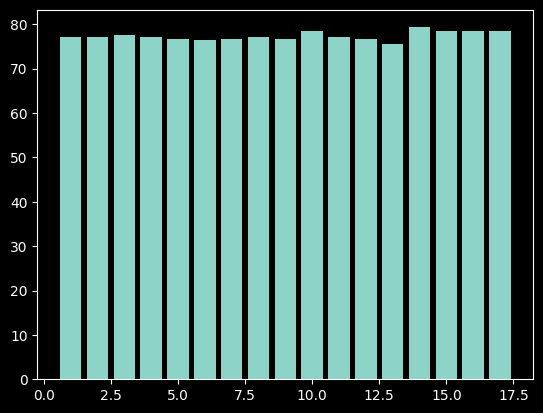

In [126]:
kList = [i for i in range(1,X.shape[1]+1)]
accList = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('k = k artinya k fitur terbaik diambil')
for k in kList:
	X_train_fs, X_test_fs = select_features(X_train, y_train, X_test,k)
	model = LogisticRegression()
	model.fit(X_train_fs, y_train)
	# evaluate the model
	yhat = model.predict(X_test_fs)
	# evaluate predictions
	accuracy = accuracy_score(y_test, yhat)*100
	accList.append(accuracy)
	print(f'Accuracy k = {k}: {round(accuracy,2)} %')
pyplot.bar(kList, accList)
pyplot.show()